Here, we'll explore linear regression using a real estate dataset. We'll predict house prices based on various features, interpret the model, and discuss its practical applications in the real estate industry.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

In [3]:
df.sample(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
5686,6.0000,34.0,6.566298,1.000000,1055.0,2.914365,34.23,-118.23,3.67100
18046,9.0704,36.0,7.252273,0.977273,1234.0,2.804545,37.23,-122.00,5.00001
13901,2.5405,15.0,6.444651,1.422326,2568.0,2.388837,34.06,-116.56,0.69600


This dataset contains information about housing in California. The features include:

MedInc: Median income in block group (tens of thousands of dollars) <br>
HouseAge: Median house age in block group <br>
AveRooms: Average number of rooms per household <br>
AveBedrms: Average number of bedrooms per household <br>
Population: Block group population <br>
AveOccup: Average number of household members <br>
Latitude: Block group latitude <br>
Longitude: Block group longitude <br>
Our target variable is the median house price. <br>

The target variable, PRICE, represents the median house price in hundreds of thousands of dollars.

In [4]:
# Selecting feature and target
X = df[['MedInc']]
y = df['PRICE']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (16512, 1)
Testing set shape: (4128, 1)


Now, let's fit our simple linear regression model to the training data.

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# print the coefficient(beta) and intercept(alpha)
print(f"Coefficient (beta): {model.coef_[0]:.4f}")
print(f"Intercept (alpha): {model.intercept_:.4f}")

Coefficient (beta): 0.4193
Intercept (alpha): 0.4446


In [7]:
# make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared score: {r2:.4f}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:4f}")


R-squared score: 0.4589
Mean Squared Error: 0.709116


Let's create a scatter plot of the data points and the regression line.

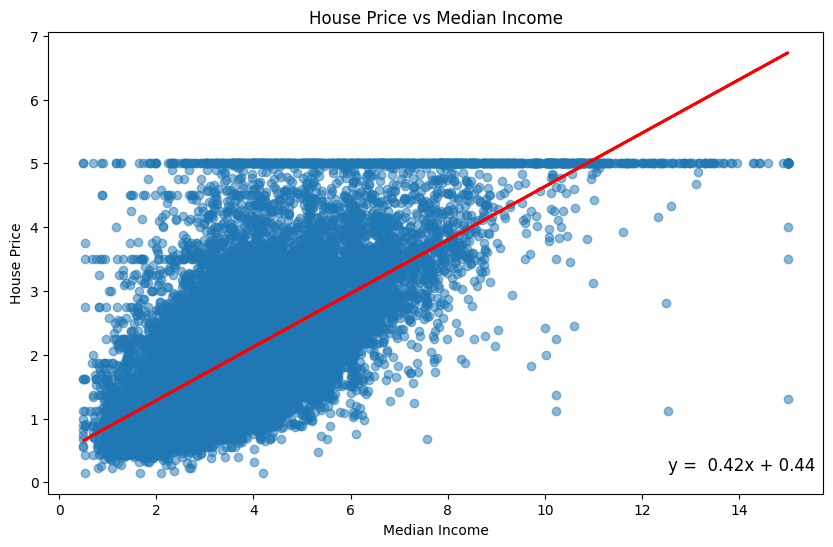

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model.predict(X), color='red', linewidth=2)

plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.title('House Price vs Median Income')

# Add the equation to the plot
equation = f'y = {model.coef_[0]: .2f}x + {model.intercept_:.2f}'
plt.text(0.8, 0.05, equation, transform=plt.gca().transAxes, fontsize=12)

plt.show()


Our linear regression model with one feature has two parameters:

Alpha (α): This is the y-intercept, which is model.intercept_ in the code. It represents the predicted house price when the median income is zero.

Beta (β): This is the slope, which is model.coef_[0] in the code. It represents the change in house price for a one-unit change in median income.

The equation of our simple linear regression line is:

House Price = model.coef_[0] * Median Income + model.intercept_

1. Interpret the slope of the linear regression model. what does it tell us about the relationship between median income and house prices?

The slope value of 0.42 indicates that for every one-unit increase in median income(which is ten thousand dollars), the predicted house price increases by approximately 0.42(which is 42 thousand dollars). This means that as the median income in a block group increases, we can predict house prices to rise at a steady rate based on this model, showing positive correlation between income and house prices.

2. Using the trained model, predict the price of a house in dollars in an area with a median income of 5.0 (
 $10,000).

In [9]:
new_income = np.array([[5.0]])
predicted_price = model.predict(new_income)*10000
print(f"Predicted price: ${predicted_price[0]: .2f}")

Predicted price: $ 25412.90


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3. I've trained a model using median income to predict house price. I can add a single additional feature to this model to maximise its performance and in this case, I would add 'HouseAge.'

In [10]:
X = df[['MedInc', 'HouseAge']]
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Coefficient for MedInc (beta): {model.coef_[0]:.4f}")
print(f"Coefficient for HouseAge (beta): {model.coef_[1]:.4f}")
print(f"Intercept (alpha): {model.intercept_:.4f}")

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"\nR-squared score: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Coefficient for MedInc (beta): 0.4334
Coefficient for HouseAge (beta): 0.0175
Intercept (alpha): -0.1103

R-squared score: 0.4941
Mean Squared Error: 0.6630


Conclusion & Insights : My choice of feature to add is affected by the evaluation metric I used. By adding 'HouseAge', I was able to increase the value of R squared to 0.4941 from 0.4589, and decrease the mean squared error to 0.6630 from 0.7091. R-squared indicates how well the independent variables explain the variation in the target variable, with higher values meaning better model fit. MSE measures the average squared difference between predicted and actual values, with lower MSE indicating more accurate predictions. By adding a relevant feature like 'HouseAge', I was able to see improvements in both R-squared and MSE, enabling the model to make more accurate predictions.